In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

583

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | nhulunbuy
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | cedar city
Processing Record 12 of Set 1 | mount darwin
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | nuuk
Processing Record 20 of Set 1 | dillon
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | valdemarpils
Processing Record 23 of Set 1 | sre

Processing Record 38 of Set 4 | fairbanks
Processing Record 39 of Set 4 | garmsar
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | poroshkovo
Processing Record 45 of Set 4 | adrar
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | kieta
Processing Record 49 of Set 4 | padang
Processing Record 50 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | zelenoborsk
Processing Record 2 of Set 5 | massaguet
Processing Record 3 of Set 5 | boyolangu
Processing Record 4 of Set 5 | butaritari
Processing Record 5 of Set 5 | wanning
Processing Record 6 of Set 5 | saint anthony
Processing Record 7 of Set 5 | guerrero negro
Processing Record 8 of Set 5 | itacoatiara
Processing Record 9 of Set 5 | sinnamary
Processing Record 10 of Set 5 | kom

Processing Record 27 of Set 8 | ulaangom
Processing Record 28 of Set 8 | port-cartier
Processing Record 29 of Set 8 | smithers
Processing Record 30 of Set 8 | lahr
Processing Record 31 of Set 8 | hulan ergi
Processing Record 32 of Set 8 | honiara
Processing Record 33 of Set 8 | port blair
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | shahr-e kord
Processing Record 36 of Set 8 | buraydah
Processing Record 37 of Set 8 | marfino
Processing Record 38 of Set 8 | tigzirt
Processing Record 39 of Set 8 | maningrida
Processing Record 40 of Set 8 | bolivar
Processing Record 41 of Set 8 | isiro
Processing Record 42 of Set 8 | itupiranga
Processing Record 43 of Set 8 | chufarovo
Processing Record 44 of Set 8 | tymoshivka
Processing Record 45 of Set 8 | salinas
Processing Record 46 of Set 8 | kaeo
Processing Record 47 of Set 8 | chagda
City not found. Skipping...
Processing Record 48 of Set 8 | mairana
Processing Record 49 of Set 8 | palmerston


Processing Record 15 of Set 12 | broome
Processing Record 16 of Set 12 | nargana
Processing Record 17 of Set 12 | jumla
Processing Record 18 of Set 12 | beibei
Processing Record 19 of Set 12 | rahimatpur
Processing Record 20 of Set 12 | mayya
Processing Record 21 of Set 12 | afmadu
City not found. Skipping...
Processing Record 22 of Set 12 | salihorsk
Processing Record 23 of Set 12 | kanigoro
Processing Record 24 of Set 12 | barabai
Processing Record 25 of Set 12 | kenai
Processing Record 26 of Set 12 | mastic beach
Processing Record 27 of Set 12 | matara
Processing Record 28 of Set 12 | angra
City not found. Skipping...
Processing Record 29 of Set 12 | le pont-de-claix
Processing Record 30 of Set 12 | paciran
Processing Record 31 of Set 12 | gravdal
Processing Record 32 of Set 12 | alpena
Processing Record 33 of Set 12 | christiansburg
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

536

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,67.59,89,90,8.01,US,2021-10-09 21:38:09
1,Nhulunbuy,-12.2333,136.7667,77.61,88,57,5.75,AU,2021-10-09 21:42:17
2,Nanortalik,60.1432,-45.2371,36.21,83,6,5.57,GL,2021-10-09 21:42:17
3,Kapaa,22.0752,-159.3190,84.18,72,40,5.99,US,2021-10-09 21:39:00
4,Rikitea,-23.1203,-134.9692,74.39,81,100,18.32,PF,2021-10-09 21:42:18
5,Punta Arenas,-53.1500,-70.9167,55.51,54,40,28.77,CL,2021-10-09 21:42:18
6,Bredasdorp,-34.5322,20.0403,51.12,87,0,5.75,ZA,2021-10-09 21:42:18
7,Vila Velha,-20.3297,-40.2925,69.75,83,90,4.61,BR,2021-10-09 21:42:19
8,New Norfolk,-42.7826,147.0587,49.71,58,52,3.00,AU,2021-10-09 21:42:19
9,Port Elizabeth,-33.9180,25.5701,59.09,75,12,13.13,ZA,2021-10-09 21:42:19


In [10]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-10-09 21:38:09,42.0970,-79.2353,67.59,89,90,8.01
1,Nhulunbuy,AU,2021-10-09 21:42:17,-12.2333,136.7667,77.61,88,57,5.75
2,Nanortalik,GL,2021-10-09 21:42:17,60.1432,-45.2371,36.21,83,6,5.57
3,Kapaa,US,2021-10-09 21:39:00,22.0752,-159.3190,84.18,72,40,5.99
4,Rikitea,PF,2021-10-09 21:42:18,-23.1203,-134.9692,74.39,81,100,18.32


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

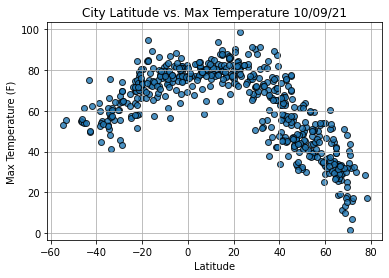

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

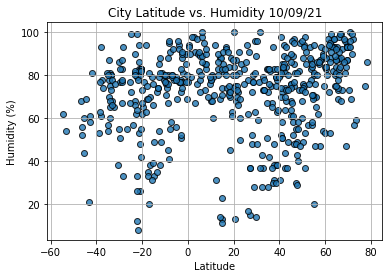

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

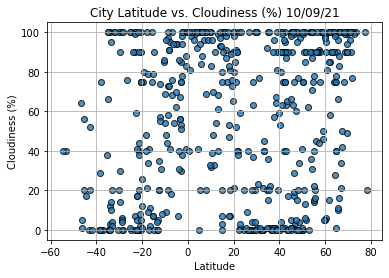

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

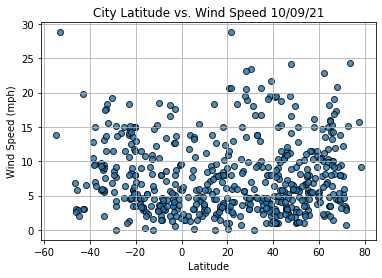

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                        Vardo
Country                        NO
Date          2021-10-09 21:42:21
Lat                       70.3705
Lng                       31.1107
Max Temp                    40.21
Humidity                       93
Cloudiness                    100
Wind Speed                    7.9
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
531     True
532    False
533     True
534     True
535     True
Name: Lat, Length: 536, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-10-09 21:38:09,42.0970,-79.2353,67.59,89,90,8.01
2,Nanortalik,GL,2021-10-09 21:42:17,60.1432,-45.2371,36.21,83,6,5.57
3,Kapaa,US,2021-10-09 21:39:00,22.0752,-159.3190,84.18,72,40,5.99
10,Cedar City,US,2021-10-09 21:42:20,37.6775,-113.0619,58.39,31,1,8.05
13,Vardo,NO,2021-10-09 21:42:21,70.3705,31.1107,40.21,93,100,7.90


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

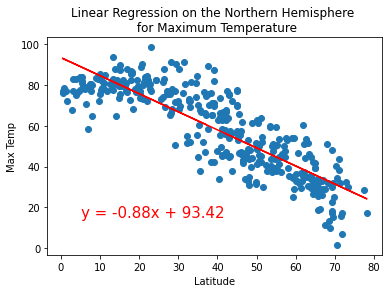

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,15))

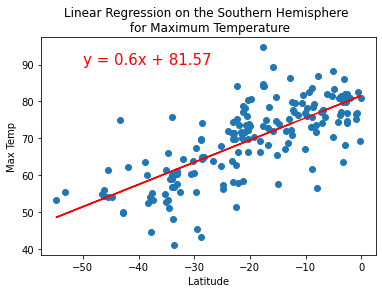

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

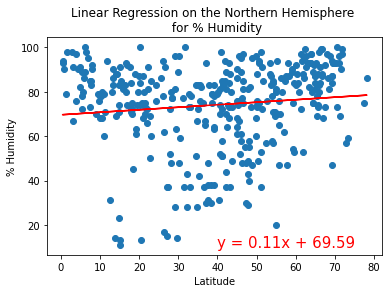

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

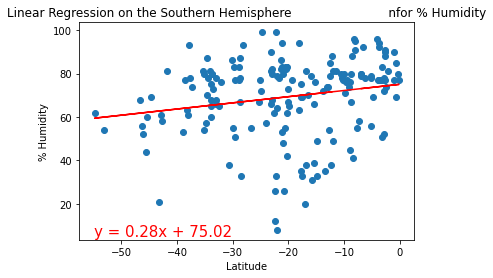

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        nfor % Humidity', '% Humidity',(-55,5))

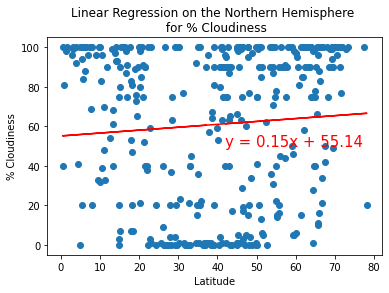

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(42,50))

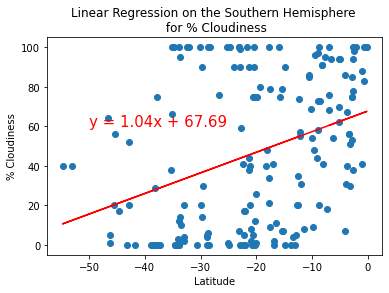

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

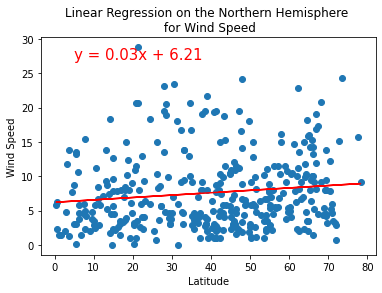

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,27))

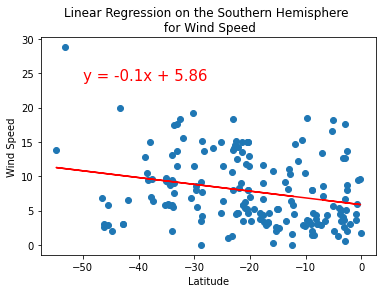

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,24))